In [71]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
ed = pd.read_excel('Education2023.xlsx',skiprows=3)
pop=pd.read_excel('PopulationEstimates.xlsx',skiprows=4)
pov=pd.read_excel('Poverty2023.xlsx',skiprows=4)
un=pd.read_excel('Unemployment2023.xlsx',skiprows=4)

In [74]:
ed_columns_to_keep = [
    "FIPS Code", "State", "Area name",  # Geographic Identifiers
    "2024 Urban Influence Code", "2023 Rural-urban Continuum Code",  # Urbanization & Influence
    # Educational Attainment, 2019-2023
    "Percent of adults who are not high school graduates, 2019-23",
    "Percent of adults who are high school graduates (or equivalent), 2019-23",
    "Percent of adults completing some college or associate degree, 2019-23",
    "Percent of adults with a bachelor's degree or higher, 2019-23",
    # Educational Attainment, 2008-2012
    # "Percent of adults who are not high school graduates, 2008-12",
    # "Percent of adults who are high school graduates (or equivalent), 2008-12",
    # "Percent of adults completing some college or associate degree, 2008-12",
    # "Percent of adults with a bachelor's degree or higher, 2008-12",
    # # Educational Attainment, 2000
    # "Percent of adults who are not high school graduates, 2000",
    # "Percent of adults who are high school graduates (or equivalent), 2000",
    # "Percent of adults completing some college or associate degree, 2000",
    # "Percent of adults with a bachelor's degree or higher, 2000",
    # # Educational Attainment, 1990
    # "Percent of adults who are not high school graduates, 1990",
    # "Percent of adults who are high school graduates (or equivalent), 1990",
    # "Percent of adults completing some college or associate degree, 1990",
    # "Percent of adults with a bachelor's degree or higher, 1990",
    # # Educational Attainment, 1980
    # "Percent of adults with less than a high school diploma, 1980",
    # "Percent of adults with a high school diploma only, 1980",
    # "Percent of adults completing some college (1-3 years), 1980",
    # "Percent of adults completing four years of college or higher, 1980",
    # # Educational Attainment, 1970
    # "Percent of adults with less than a high school diploma, 1970",
    # "Percent of adults with a high school diploma only, 1970",
    # "Percent of adults completing some college (1-3 years), 1970",
    # "Percent of adults completing four years of college or higher, 1970"
]
ed_filtered=ed[ed_columns_to_keep]

In [75]:
pov_columns_to_keep = [
    # Geographic Identifiers
    "FIPS_Code", "Stabr", "Area_Name",
    # Urbanization & Influence
    "Rural_Urban_Continuum_Code_2023", "Urban_Influence_Code_2024",
    # Economic Indicators/Poverty Metrics
    "MEDHHINC_2023", "PCTPOVALL_2023", "PCTPOV017_2023",
    "PCTPOV517_2023", "PCTPOV04_2023"
]
pov_filtered=pov[pov_columns_to_keep]


In [124]:
pop_columns_to_keep = [
    # Geographic Identifiers
    "FIPStxt", "State", "Area_Name",
    # Economic Indicators
    "Economic_typology_2015",
    # Urbanization & Influence
    "Rural_Urban_Continuum_Code_2023", "Urban_Influence_2013",
    # Population Metrics
    "CENSUS_2020_POP", "ESTIMATES_BASE_2020",
    # 2020-2023 Metrics
    "POP_ESTIMATE_2021", "N_POP_CHG_2021", "BIRTHS_2021",
    "DEATHS_2021", "NATURAL_CHG_2021", "INTERNATIONAL_MIG_2021",
    "DOMESTIC_MIG_2021", "NET_MIG_2021", "R_BIRTH_2021", "R_DEATH_2021",
    "R_NATURAL_CHG_2021", "R_INTERNATIONAL_MIG_2021", "R_DOMESTIC_MIG_2021", "R_NET_MIG_2021"
]
pop_filtered=pop[pop_columns_to_keep]


In [77]:
un_columns_to_keep = [
    # Geographic Identifiers
    "FIPS_Code", "State", "Area_Name",
    # Economic Indicators
    "Median_Household_Income_2022", "Med_HH_Income_Percent_of_State_Total_2022",
    # Urbanization & Influence
    "Rural_Urban_Continuum_Code_2023", "Urban_Influence_Code_2013", "Metro_2023",
    # Employment Metrics over 24 years
    "Civilian_labor_force_2023", "Employed_2023", "Unemployed_2023", "Unemployment_rate_2023"
]
un_filtered=un[un_columns_to_keep]

In [78]:
# def pairs(df):
#     num= df.select_dtypes(include=['number'])

#     # Count non-null values in each numerical column
#     corr_matrix=num.corr()
#     # import seaborn as sns
#     # import matplotlib.pyplot as plt

#     # # Plotting the heatmap for the full correlation matrix
#     # plt.figure(figsize=(12, 8))
#     # sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#     # plt.title("Correlation Heatmap")
#     # plt.show()

#     corr_pairs = corr_matrix.unstack().sort_values(ascending=False, key=abs)

#     # Filter out the diagonal (self-correlations) and weak correlations
#     corr_pairs = corr_pairs[(corr_pairs < 1) & (abs(corr_pairs) > 0.7)]

#     # Display the most correlated pairs
#     print(corr_pairs)

def pairs(df, threshold=0.7):
    df=df.select_dtypes(include=['number'])
    # Calculate correlations
    corr_matrix = df.corr()
    
    # Convert to long format, keeping only high correlations
    correlations = []
    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if col1 < col2:  # Avoid duplicate pairs and self-correlations
                corr_value = corr_matrix.loc[col1, col2]
                if abs(corr_value) >= threshold:
                    correlations.append({
                        'col1': col1,
                        'col2': col2,
                        'correlation': corr_value
                    })
    
    # Sort by absolute correlation value
    result = pd.DataFrame(correlations)
    if len(result) > 0:
        return result.sort_values(by='correlation', key=abs, ascending=False)
    else:
        print(f"No correlations found above threshold of {threshold}")
        return result

In [79]:
#ed_filtered
#pov_filtered
#pop_filtered
#un_filtered
pairs(ed_filtered)

col1  \
0                    2023 Rural-urban Continuum Code   
1  Percent of adults who are high school graduate...   

                                                col2  correlation  
0                          2024 Urban Influence Code     0.832606  
1  Percent of adults with a bachelor's degree or ...    -0.807936

In [80]:
pairs(pov_filtered)

col1                       col2  correlation
5                   PCTPOV017_2023             PCTPOV517_2023     0.990505
6                   PCTPOV017_2023              PCTPOV04_2023     0.987752
9                    PCTPOV04_2023             PCTPOV517_2023     0.976137
8                    PCTPOV04_2023             PCTPOVALL_2023     0.972464
4                   PCTPOV017_2023             PCTPOVALL_2023     0.938458
7                   PCTPOV517_2023             PCTPOVALL_2023     0.925837
0  Rural_Urban_Continuum_Code_2023  Urban_Influence_Code_2024     0.829060
2                    MEDHHINC_2023             PCTPOV017_2023    -0.769964
1                    MEDHHINC_2023             PCTPOVALL_2023    -0.762752
3                    MEDHHINC_2023             PCTPOV517_2023    -0.758104

In [81]:
pairs(pop_filtered)

col1                    col2  correlation
1                   CENSUS_2020_POP     ESTIMATES_BASE_2020     1.000000
6               ESTIMATES_BASE_2020       POP_ESTIMATE_2021     0.999997
2                   CENSUS_2020_POP       POP_ESTIMATE_2021     0.999997
11                      BIRTHS_2021       POP_ESTIMATE_2021     0.999835
9                       BIRTHS_2021         CENSUS_2020_POP     0.999813
10                      BIRTHS_2021     ESTIMATES_BASE_2020     0.999813
16                      DEATHS_2021       POP_ESTIMATE_2021     0.999527
3                   CENSUS_2020_POP             DEATHS_2021     0.999492
15                      DEATHS_2021     ESTIMATES_BASE_2020     0.999492
12                      BIRTHS_2021             DEATHS_2021     0.999251
26              R_DOMESTIC_MIG_2021          R_NET_MIG_2021     0.998629
20           INTERNATIONAL_MIG_2021       POP_ESTIMATE_2021     0.995242
5                   CENSUS_2020_POP  INTERNATIONAL_MIG_2021     0.995214
8               ESTIMATES_BASE_2020  INTERNATIONAL_MIG_2021     0.995210
14                      BIRTHS_2021  INTERNATIONAL_MIG_2021     0.994889
18                      DEATHS_2021  INTERNATIONAL_MIG_2021     0.993847
24                     NET_MIG_2021          N_POP_CHG_2021     0.973143
23                DOMESTIC_MIG_2021            NET_MIG_2021     0.882341
25                     R_DEATH_2021      R_NATURAL_CHG_2021    -0.857122
0   Rural_Urban_Continuum_Code_2023    Urban_Influence_2013     0.847701
22                DOMESTIC_MIG_2021          N_POP_CHG_2021     0.774628
21           INTERNATIONAL_MIG_2021        NATURAL_CHG_2021     0.764448
13                      BIRTHS_2021        NATURAL_CHG_2021     0.763392
4                   CENSUS_2020_POP        NATURAL_CHG_2021     0.756140
7               ESTIMATES_BASE_2020        NATURAL_CHG_2021     0.756112
19                 NATURAL_CHG_2021       POP_ESTIMATE_2021     0.755906
17                      DEATHS_2021        NATURAL_CHG_2021     0.737823

In [82]:
pairs(un_filtered)

col1                             col2  \
4                  Civilian_labor_force_2023                    Employed_2023   
5                  Civilian_labor_force_2023                  Unemployed_2023   
6                              Employed_2023                  Unemployed_2023   
2                                 Metro_2023  Rural_Urban_Continuum_Code_2023   
1            Rural_Urban_Continuum_Code_2023        Urban_Influence_Code_2013   
0  Med_HH_Income_Percent_of_State_Total_2022     Median_Household_Income_2022   
3                                 Metro_2023        Urban_Influence_Code_2013   

   correlation  
4     0.999998  
5     0.998910  
6     0.998826  
2    -0.884642  
1     0.847672  
0     0.827318  
3    -0.754921

In [83]:
pov_filtered.head()

FIPS_Code Stabr       Area_Name  Rural_Urban_Continuum_Code_2023  \
0          0    US   United States                              NaN   
1       1000    AL         Alabama                              NaN   
2       1001    AL  Autauga County                              2.0   
3       1003    AL  Baldwin County                              3.0   
4       1005    AL  Barbour County                              6.0   

   Urban_Influence_Code_2024  MEDHHINC_2023  PCTPOVALL_2023  PCTPOV017_2023  \
0                        NaN        77719.0            12.5            16.0   
1                        NaN        62248.0            15.7            21.3   
2                        4.0        68857.0            11.7            17.0   
3                        4.0        74248.0            10.0            14.1   
4                        5.0        45298.0            25.5            34.8   

   PCTPOV517_2023  PCTPOV04_2023  
0            15.3           16.8  
1            20.2           23.2  
2            16.7            NaN  
3            13.0            NaN  
4            33.2            NaN

In [163]:

import folium

# Load the shapefile for US counties (GeoJSON format)
geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"





# Define map
m = folium.Map(location=[37.8, -96], zoom_start=4, min_zoom=4)

# Fit to mainland US bounds (approximate lat/lon for lower 48 states)
m.fit_bounds([ [24.396308, -125.0], [49.384358, -66.93457] ])

# Add the choropleth layer
folium.Choropleth(
    geo_data=geojson_url,
    name="choropleth",
    data=pov_filtered,
    columns=["FIPS_Code", "PCTPOV017_2023"],
    key_on="feature.id",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Poverty",
).add_to(m)

# Display the updated map
m



In [126]:
pop_filtered.head()

FIPStxt State       Area_Name  Economic_typology_2015  \
0        0    US   United States                     NaN   
1     1000    AL         Alabama                     NaN   
2     1001    AL  Autauga County                     0.0   
3     1003    AL  Baldwin County                     5.0   
4     1005    AL  Barbour County                     3.0   

   Rural_Urban_Continuum_Code_2023  Urban_Influence_2013  CENSUS_2020_POP  \
0                              NaN                   NaN      331449281.0   
1                              NaN                   NaN        5024279.0   
2                              2.0                   2.0          58805.0   
3                              3.0                   2.0         231767.0   
4                              6.0                   6.0          25223.0   

   ESTIMATES_BASE_2020  POP_ESTIMATE_2021  N_POP_CHG_2021  ...  \
0          331464948.0        332048977.0        522044.0  ...   
1            5024294.0          5050380.0         18516.0  ...   
2              58809.0            59203.0           288.0  ...   
3             231768.0           239439.0          6212.0  ...   
4              25229.0            24533.0          -436.0  ...   

   NATURAL_CHG_2021  INTERNATIONAL_MIG_2021  DOMESTIC_MIG_2021  NET_MIG_2021  \
0          146036.0                376008.0                0.0      376008.0   
1          -11951.0                  1806.0            27715.0       29521.0   
2             -10.0                    15.0              242.0         257.0   
3            -611.0                   105.0             6972.0        7077.0   
4            -120.0                     0.0             -313.0        -313.0   

   R_BIRTH_2021  R_DEATH_2021  R_NATURAL_CHG_2021  R_INTERNATIONAL_MIG_2021  \
0          10.8          10.4                 0.4                       1.1   
1          11.3          13.7                -2.4                       0.4   
2          11.6          11.8                -0.2                       0.3   
3           9.9          12.5                -2.6                       0.4   
4          10.9          15.8                -4.8                       0.0   

   R_DOMESTIC_MIG_2021  R_NET_MIG_2021  
0                  0.0             1.1  
1                  5.5             5.9  
2                  4.1             4.4  
3                 29.5            29.9  
4                -12.6           -12.6  

[5 rows x 22 columns]

In [127]:
pop_filtered['FIPStxt'].unique()

array([    0,  1000,  1001, ..., 72149, 72151, 72153], dtype=int64)

In [135]:
ed_filtered.head()

FIPS Code State       Area name  2024 Urban Influence Code  \
0          0    US   United States                        NaN   
1       1000    AL         Alabama                        NaN   
2       1001    AL  Autauga County                        4.0   
3       1003    AL  Baldwin County                        4.0   
4       1005    AL  Barbour County                        5.0   

   2023 Rural-urban Continuum Code  \
0                              NaN   
1                              NaN   
2                              2.0   
3                              3.0   
4                              6.0   

   Percent of adults who are not high school graduates, 2019-23  \
0                                          10.607067              
1                                          11.871959              
2                                           9.721098              
3                                           8.268600              
4                                          22.186295              

   Percent of adults who are high school graduates (or equivalent), 2019-23  \
0                                          26.194137                          
1                                          30.344616                          
2                                          32.675939                          
3                                          27.542038                          
4                                          37.604947                          

   Percent of adults completing some college or associate degree, 2019-23  \
0                                          28.197846                        
1                                          30.028286                        
2                                          29.320284                        
3                                          31.391725                        
4                                          28.744044                        

   Percent of adults with a bachelor's degree or higher, 2019-23  
0                                          35.000950              
1                                          27.755139              
2                                          28.282680              
3                                          32.797637              
4                                          11.464715

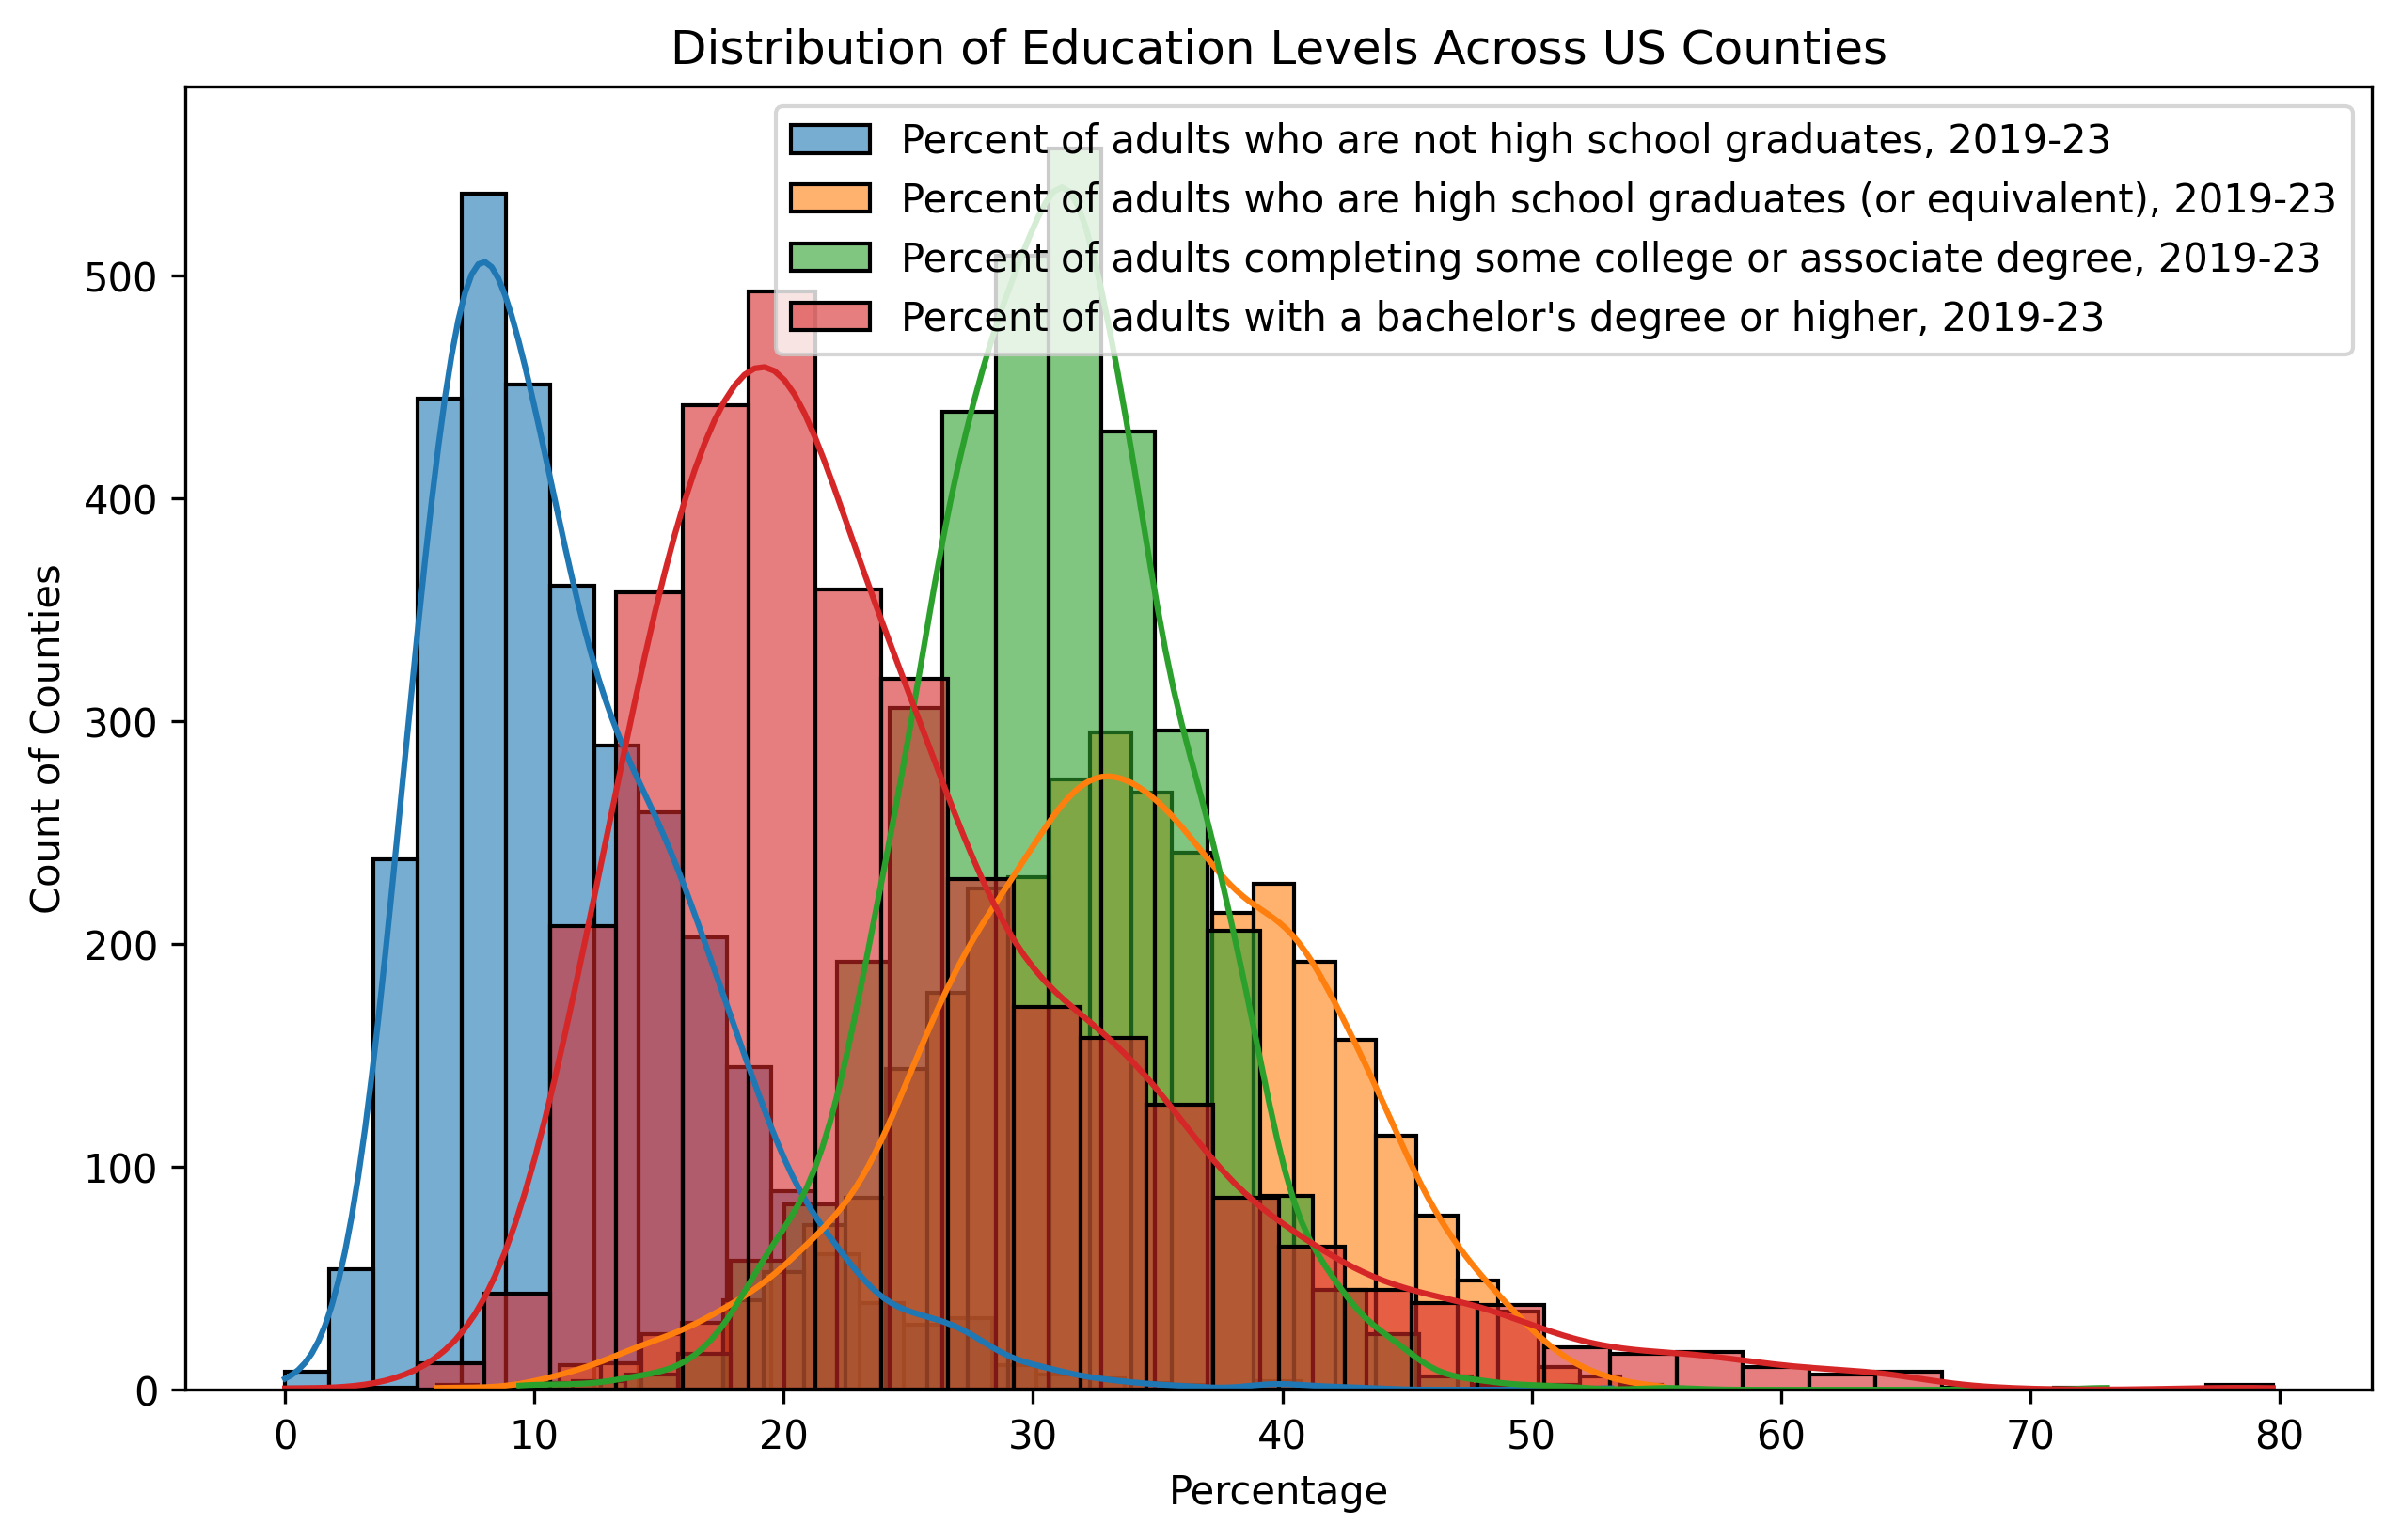

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

plt.figure(figsize=(10, 6))
education_cols = [
    'Percent of adults who are not high school graduates, 2019-23',
    'Percent of adults who are high school graduates (or equivalent), 2019-23',
    'Percent of adults completing some college or associate degree, 2019-23',
    'Percent of adults with a bachelor\'s degree or higher, 2019-23'
]

for col in education_cols:
    sns.histplot(ed_filtered[col], kde=True, label=col, alpha=0.6, bins=30)

plt.legend()
plt.title("Distribution of Education Levels Across US Counties")
plt.xlabel("Percentage")
plt.ylabel("Count of Counties")
plt.show()


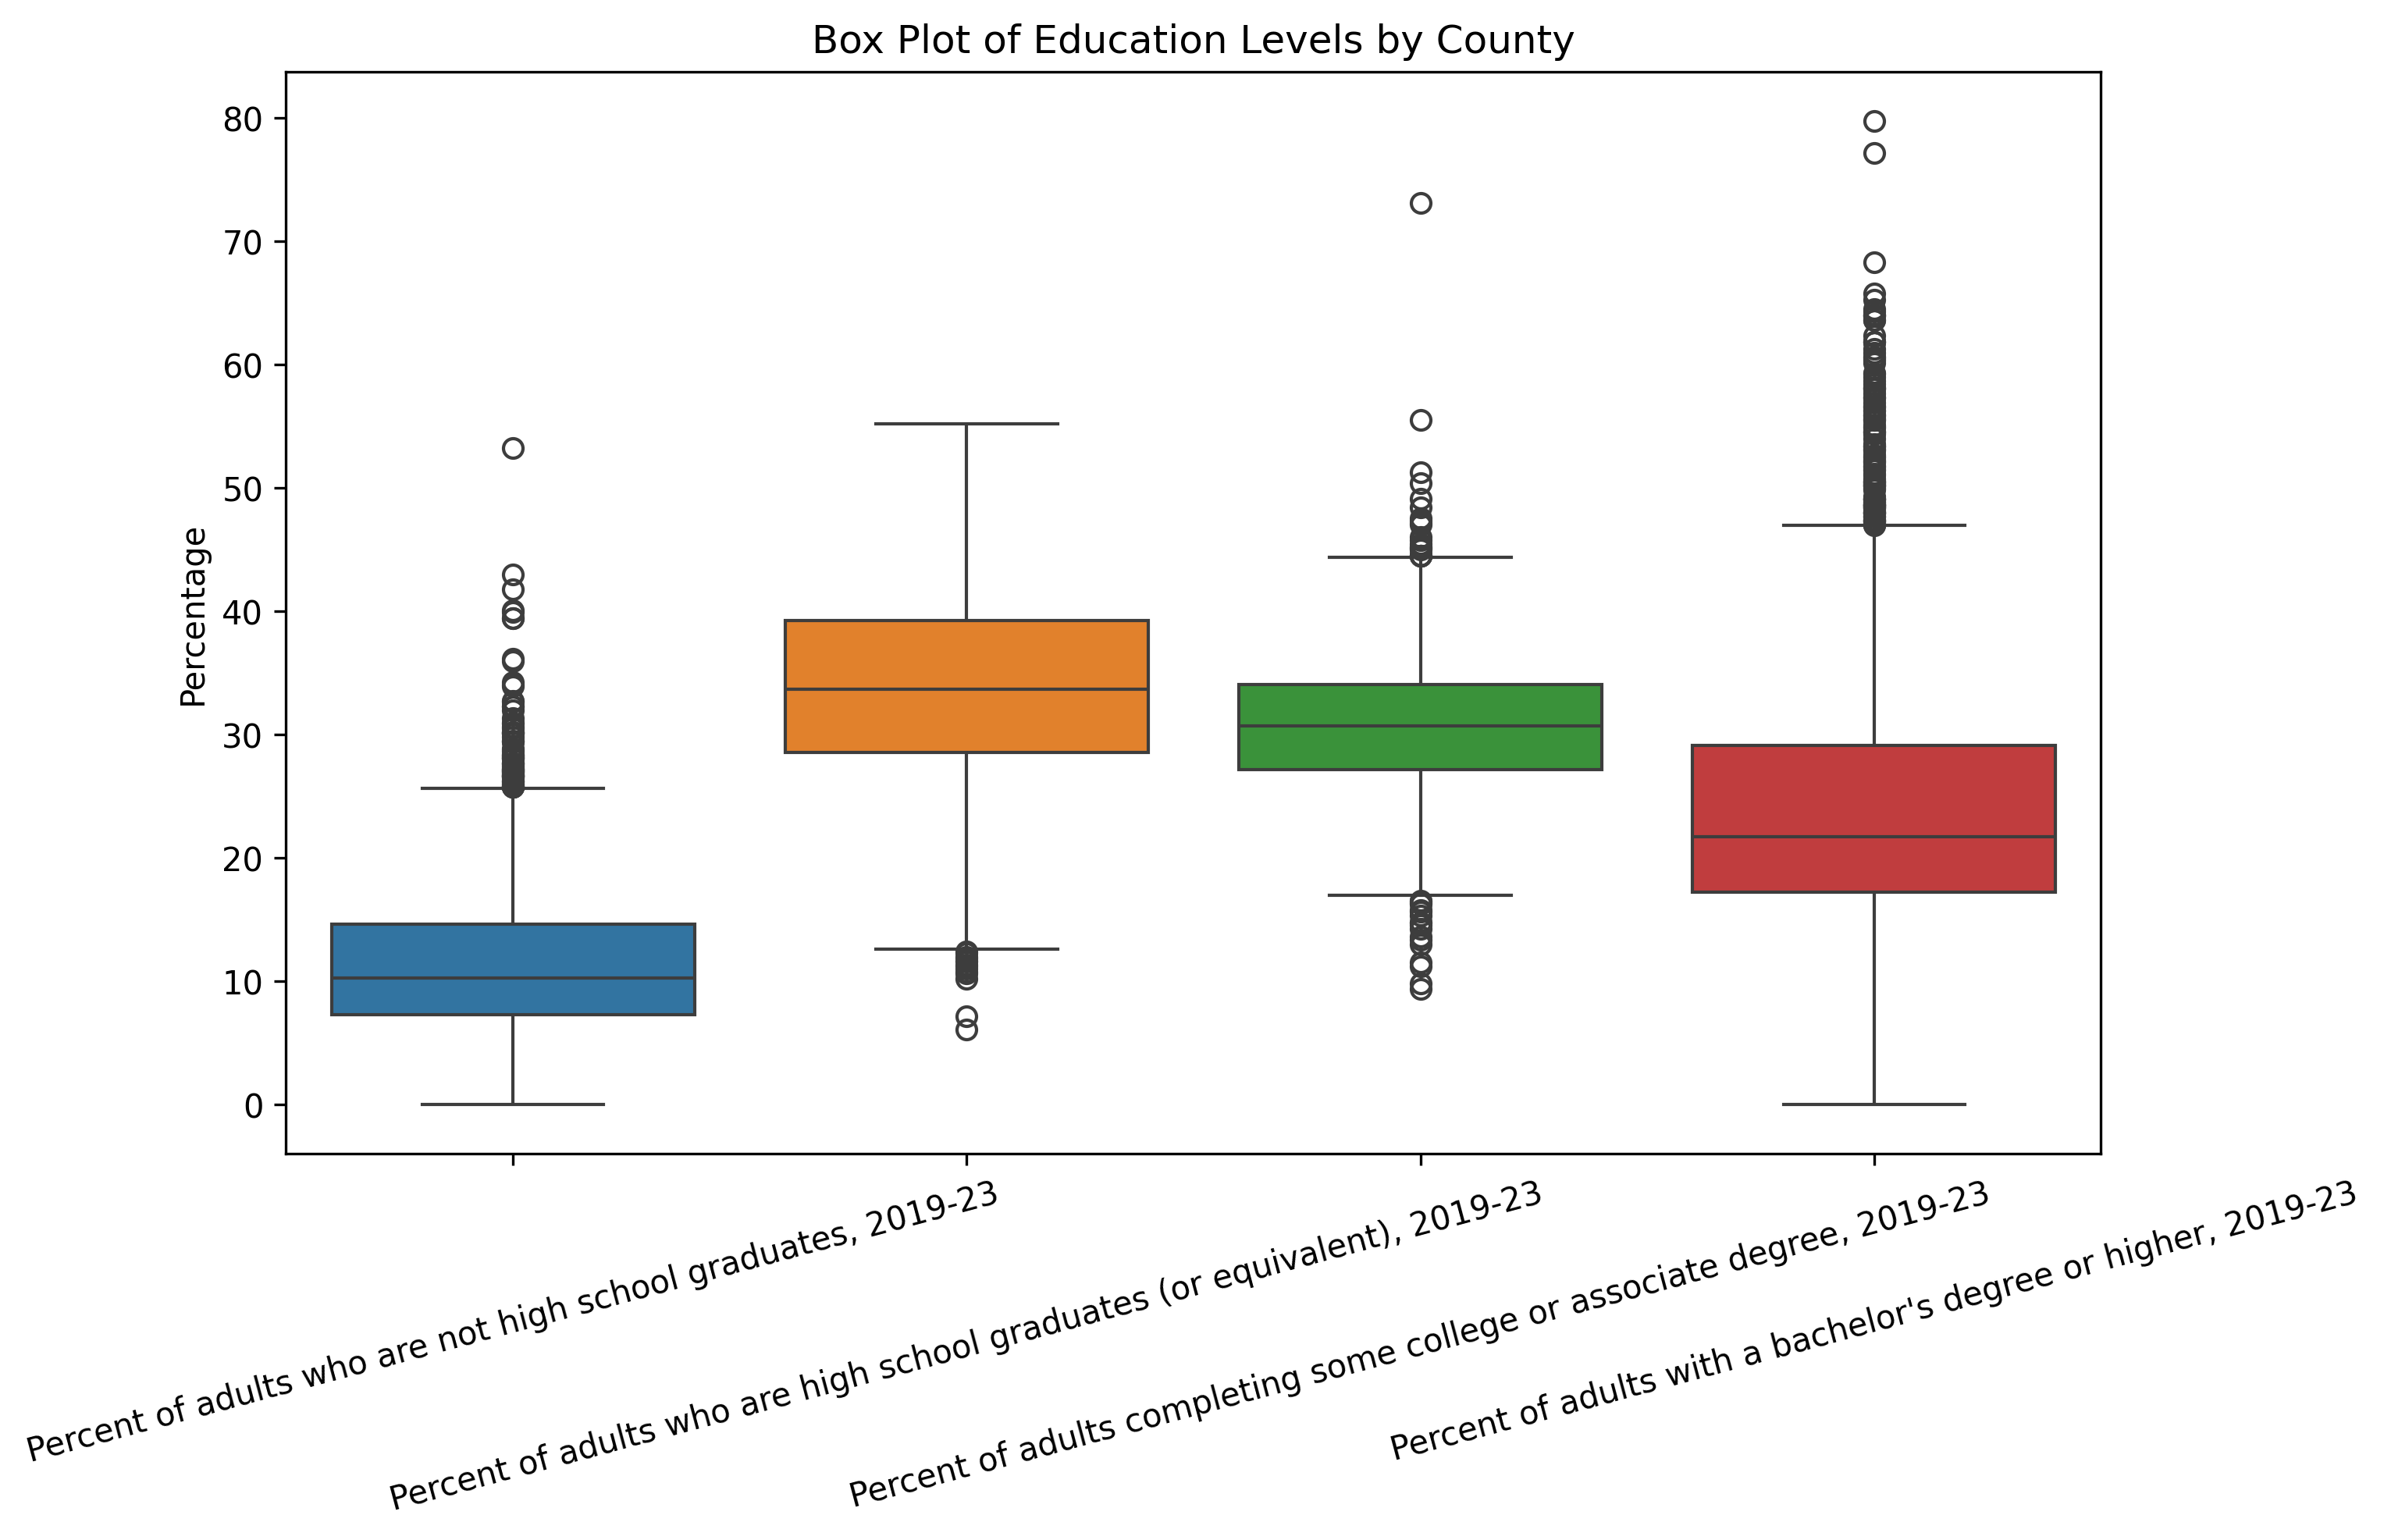

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ed_filtered[education_cols])
plt.xticks(rotation=15)
plt.title("Box Plot of Education Levels by County")
plt.ylabel("Percentage")
plt.show()


<Figure size 3600x1800 with 0 Axes>

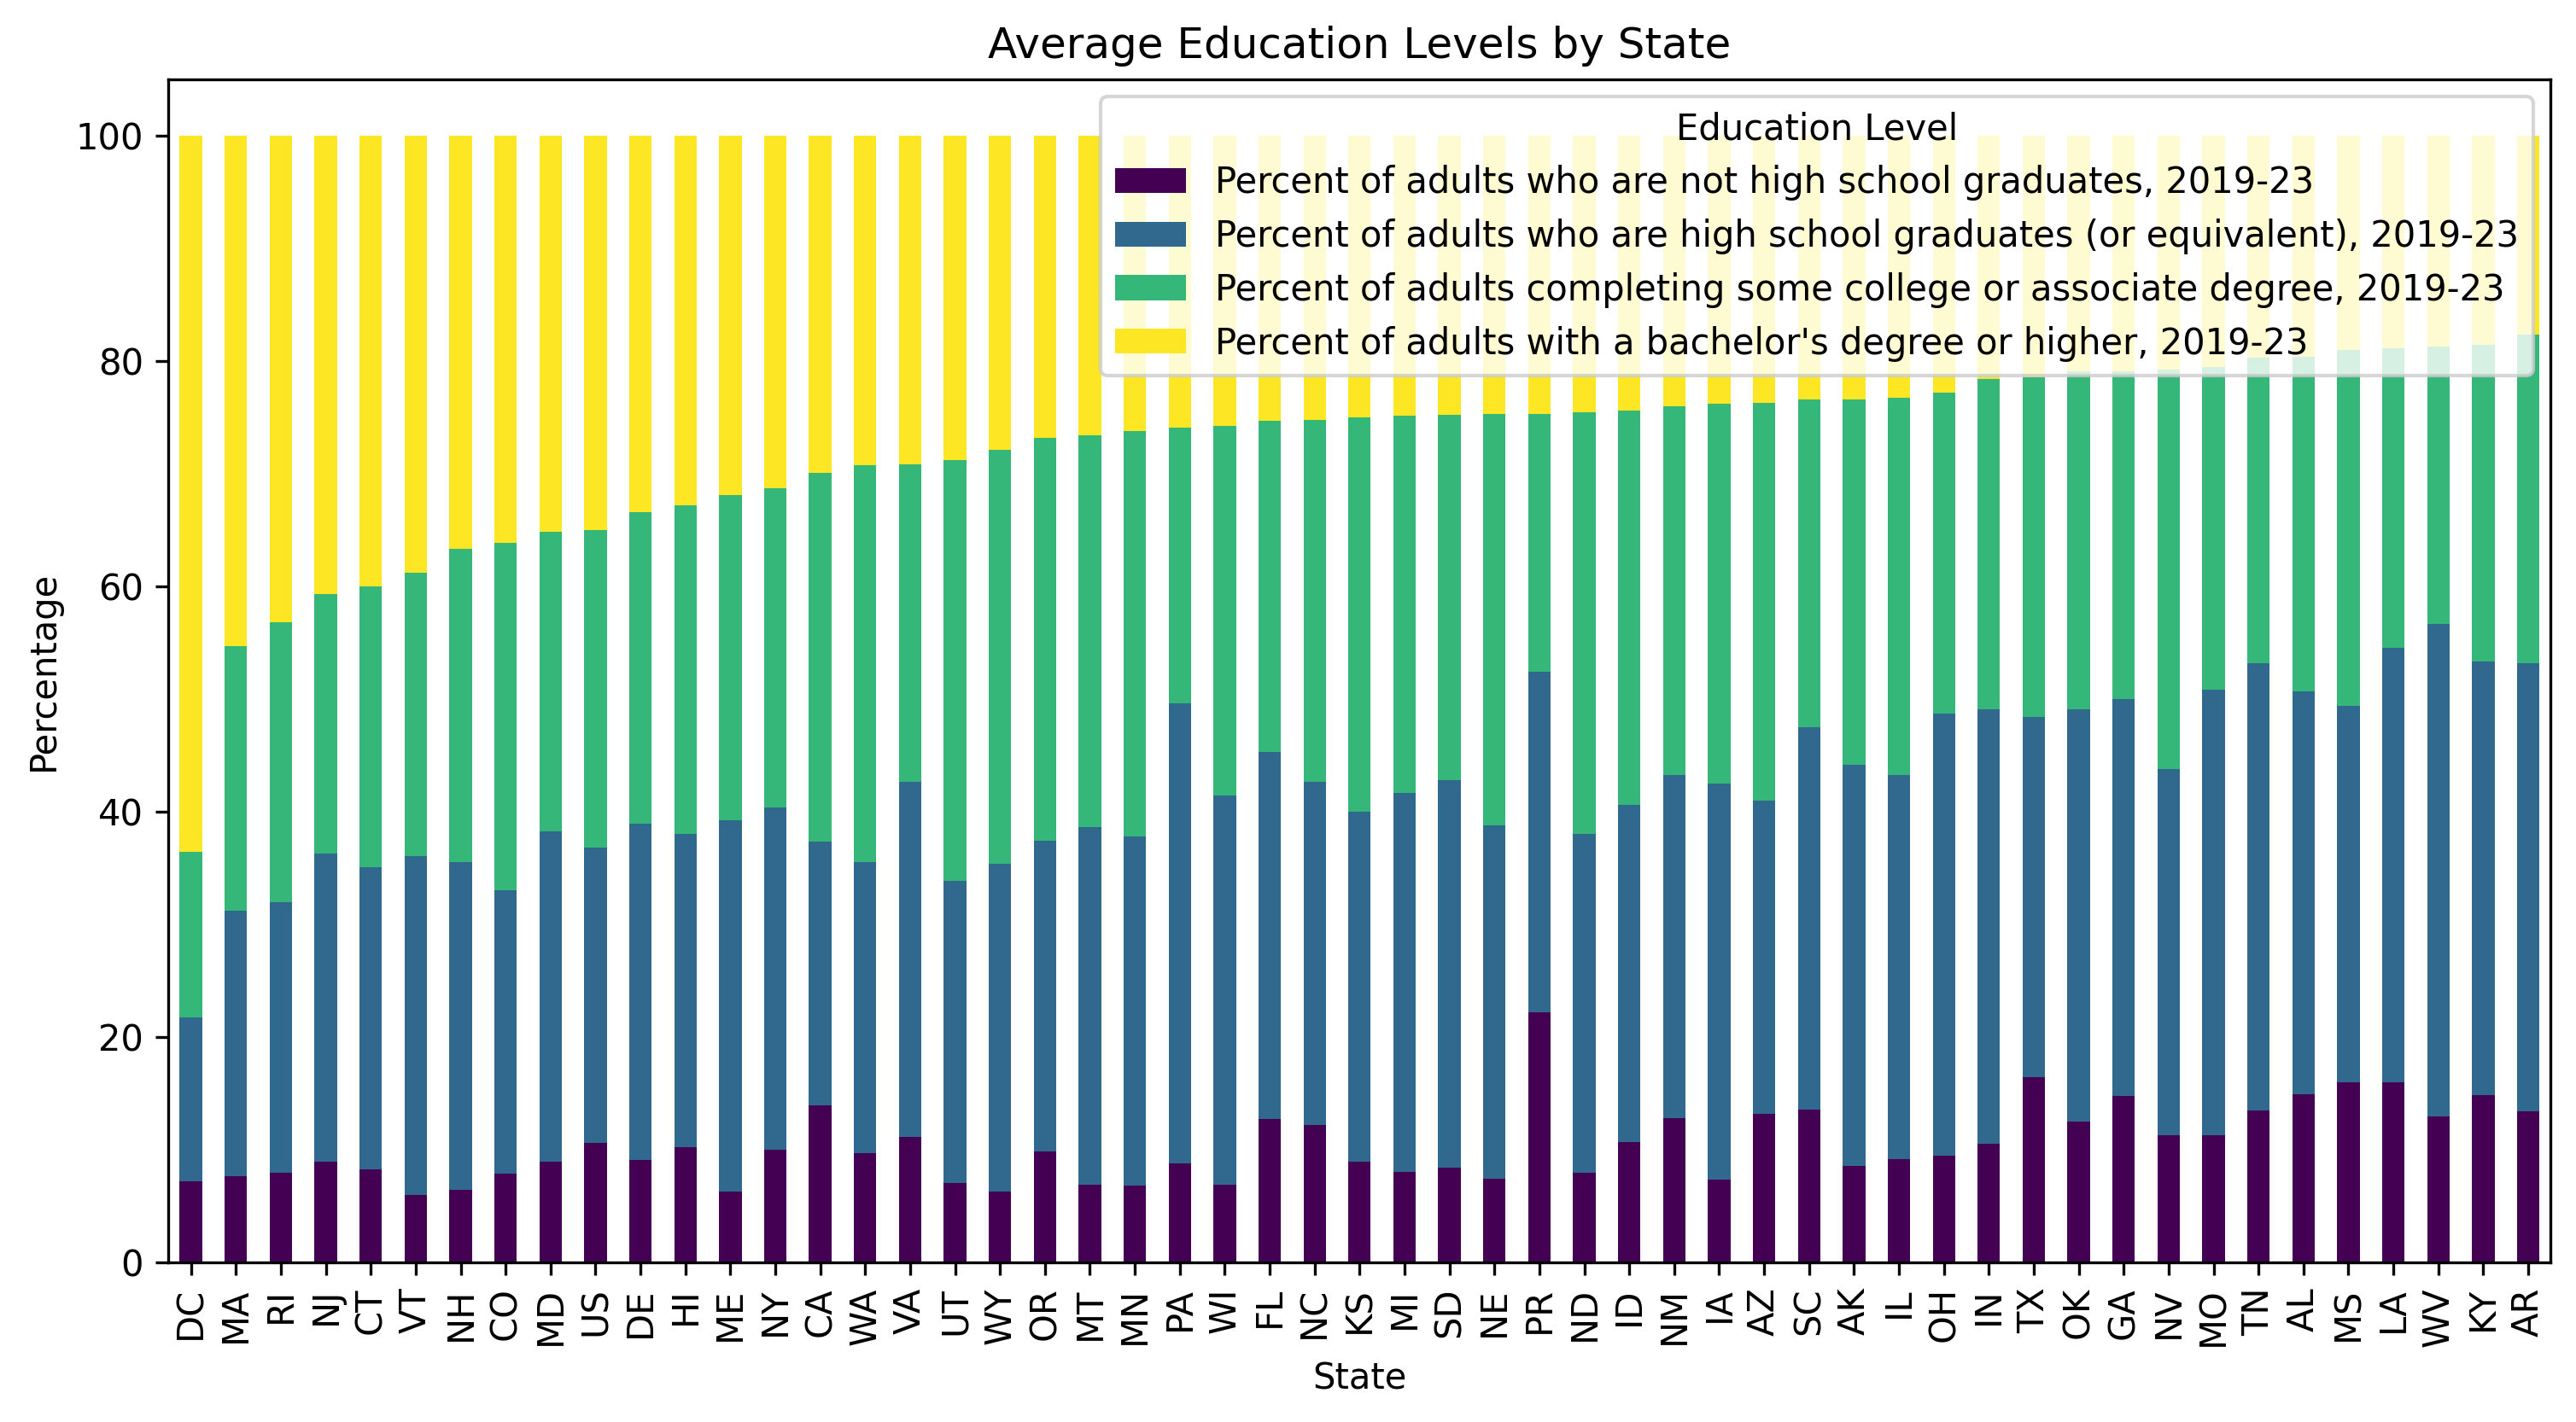

In [139]:
state_avg = ed_filtered.groupby("State")[education_cols].mean().sort_values(by="Percent of adults with a bachelor's degree or higher, 2019-23", ascending=False)

plt.figure(figsize=(12, 6))
state_avg.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.title("Average Education Levels by State")
plt.ylabel("Percentage")
plt.legend(title="Education Level", loc="upper right")
plt.show()


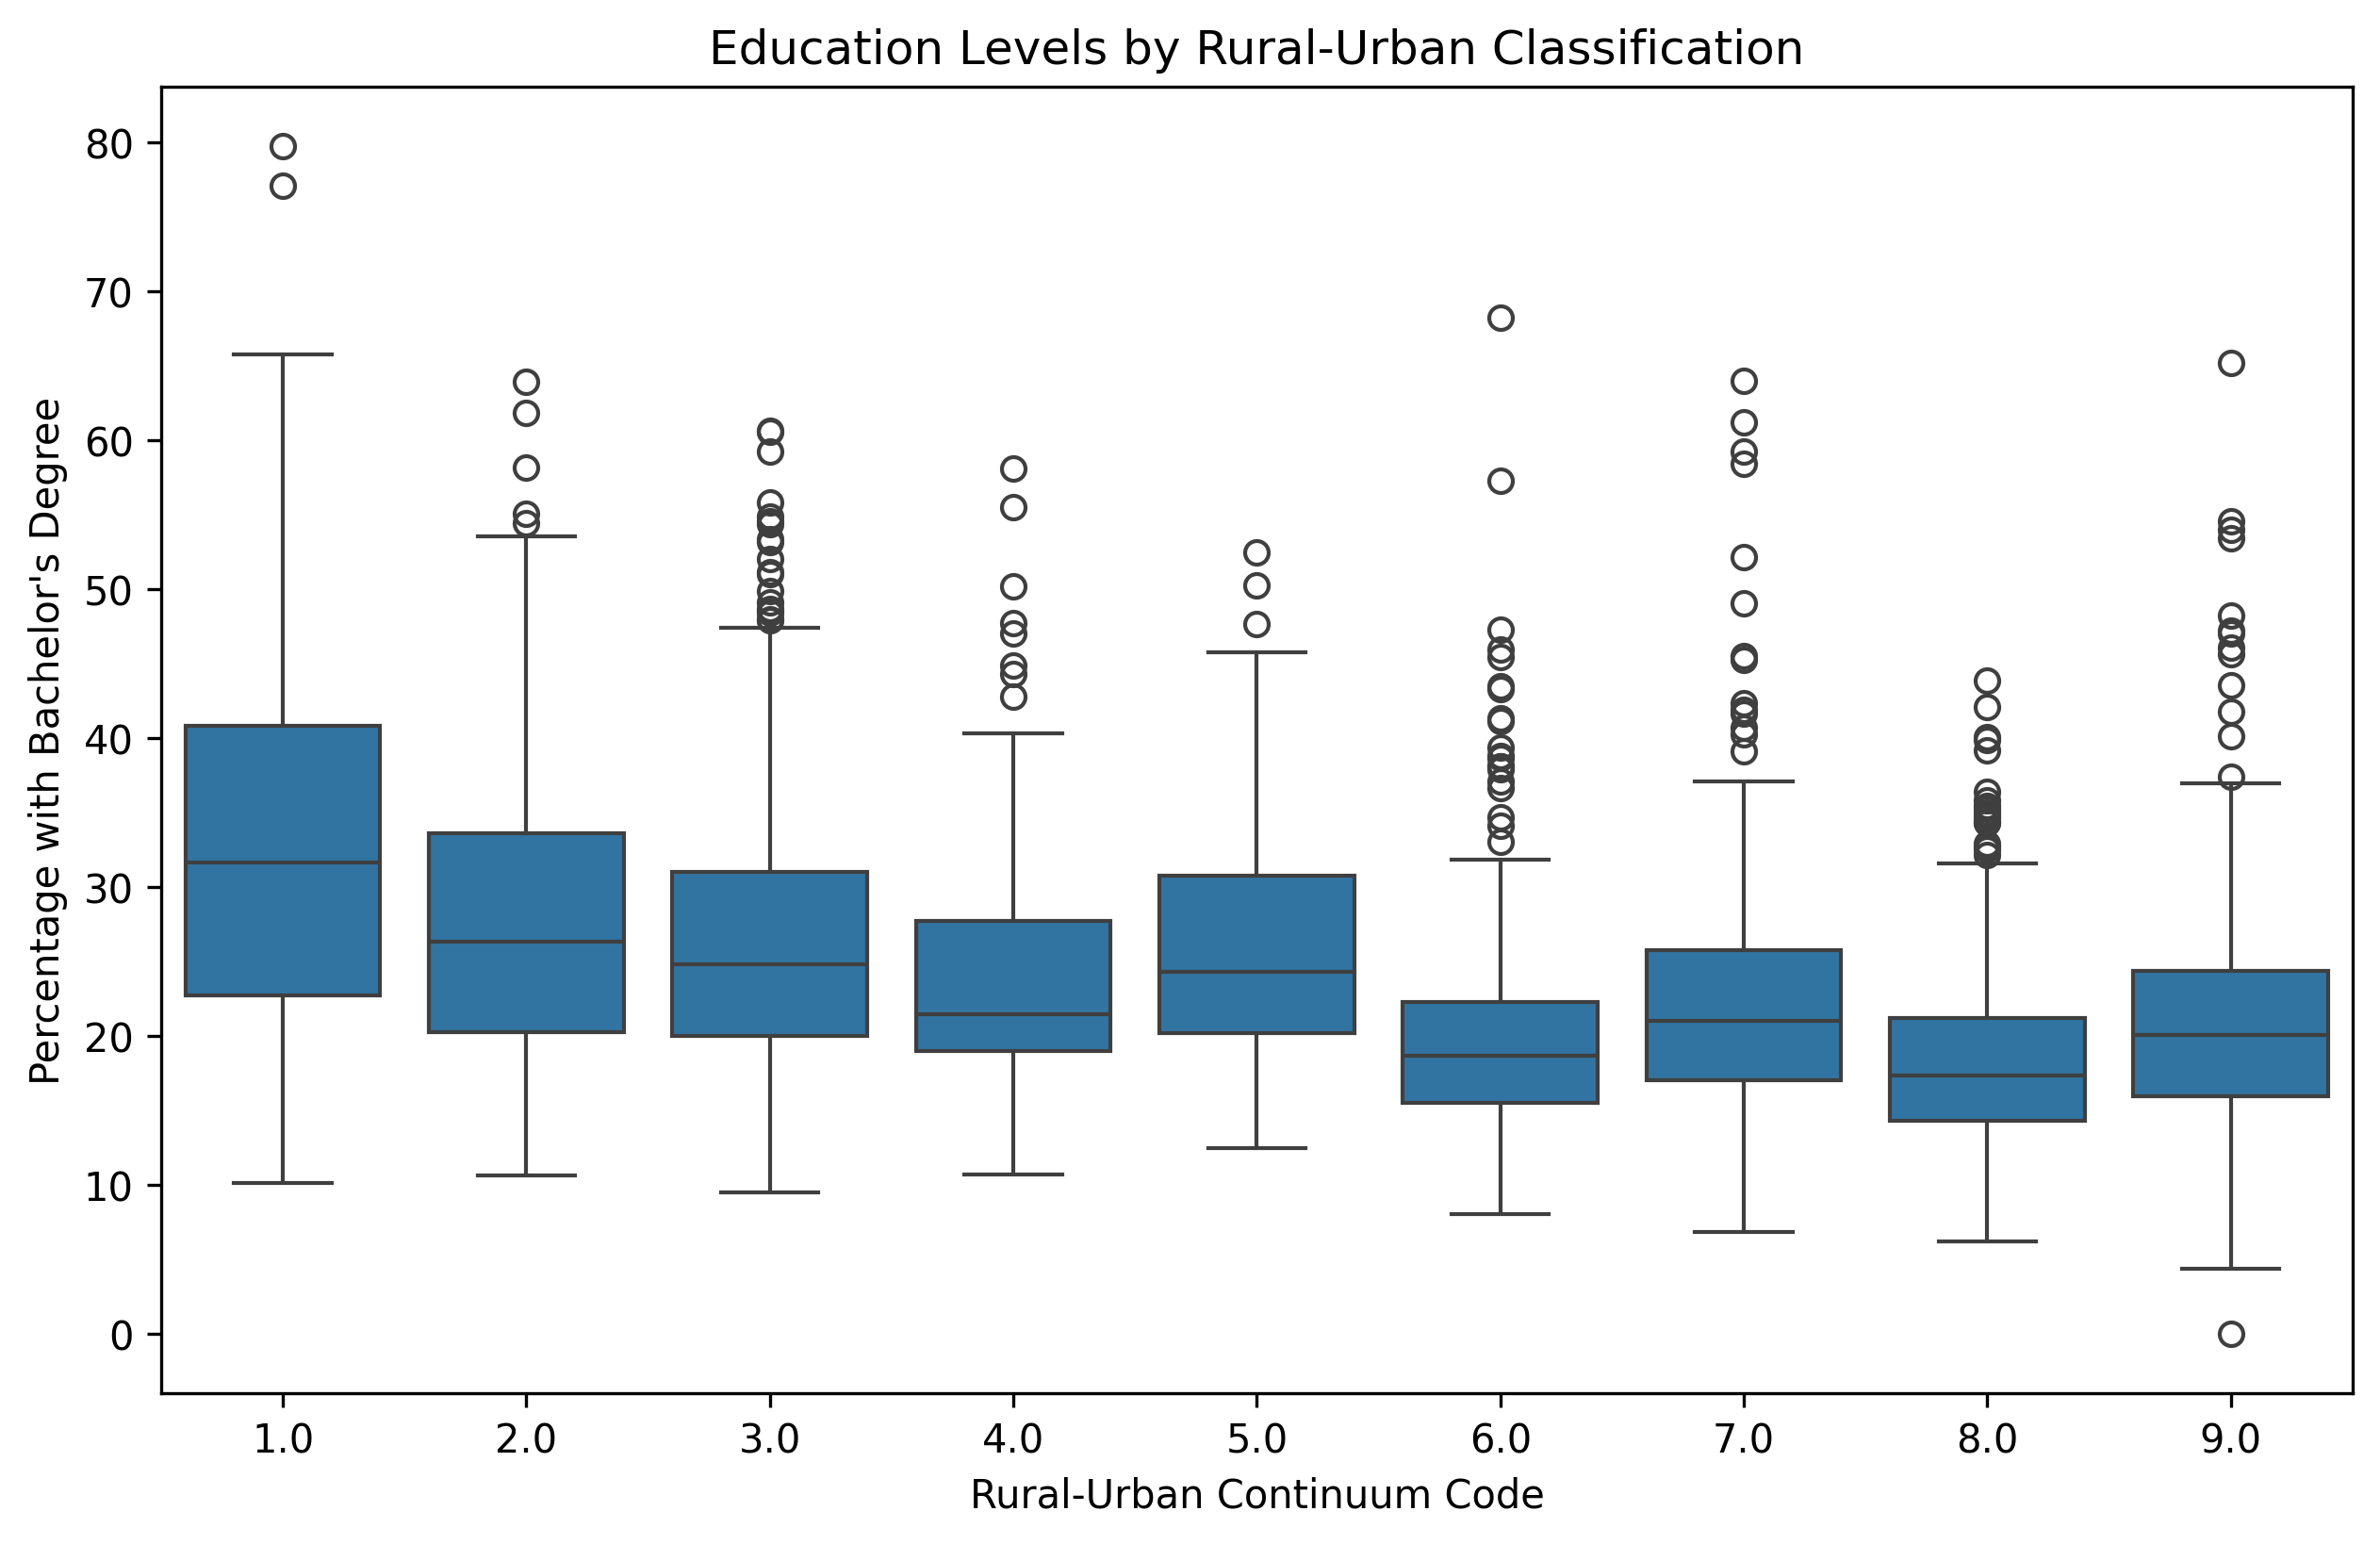

In [141]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ed_filtered["2023 Rural-urban Continuum Code"], y=ed_filtered["Percent of adults with a bachelor's degree or higher, 2019-23"])
plt.title("Education Levels by Rural-Urban Classification")
plt.xlabel("Rural-Urban Continuum Code")
plt.ylabel("Percentage with Bachelor's Degree")
plt.show()


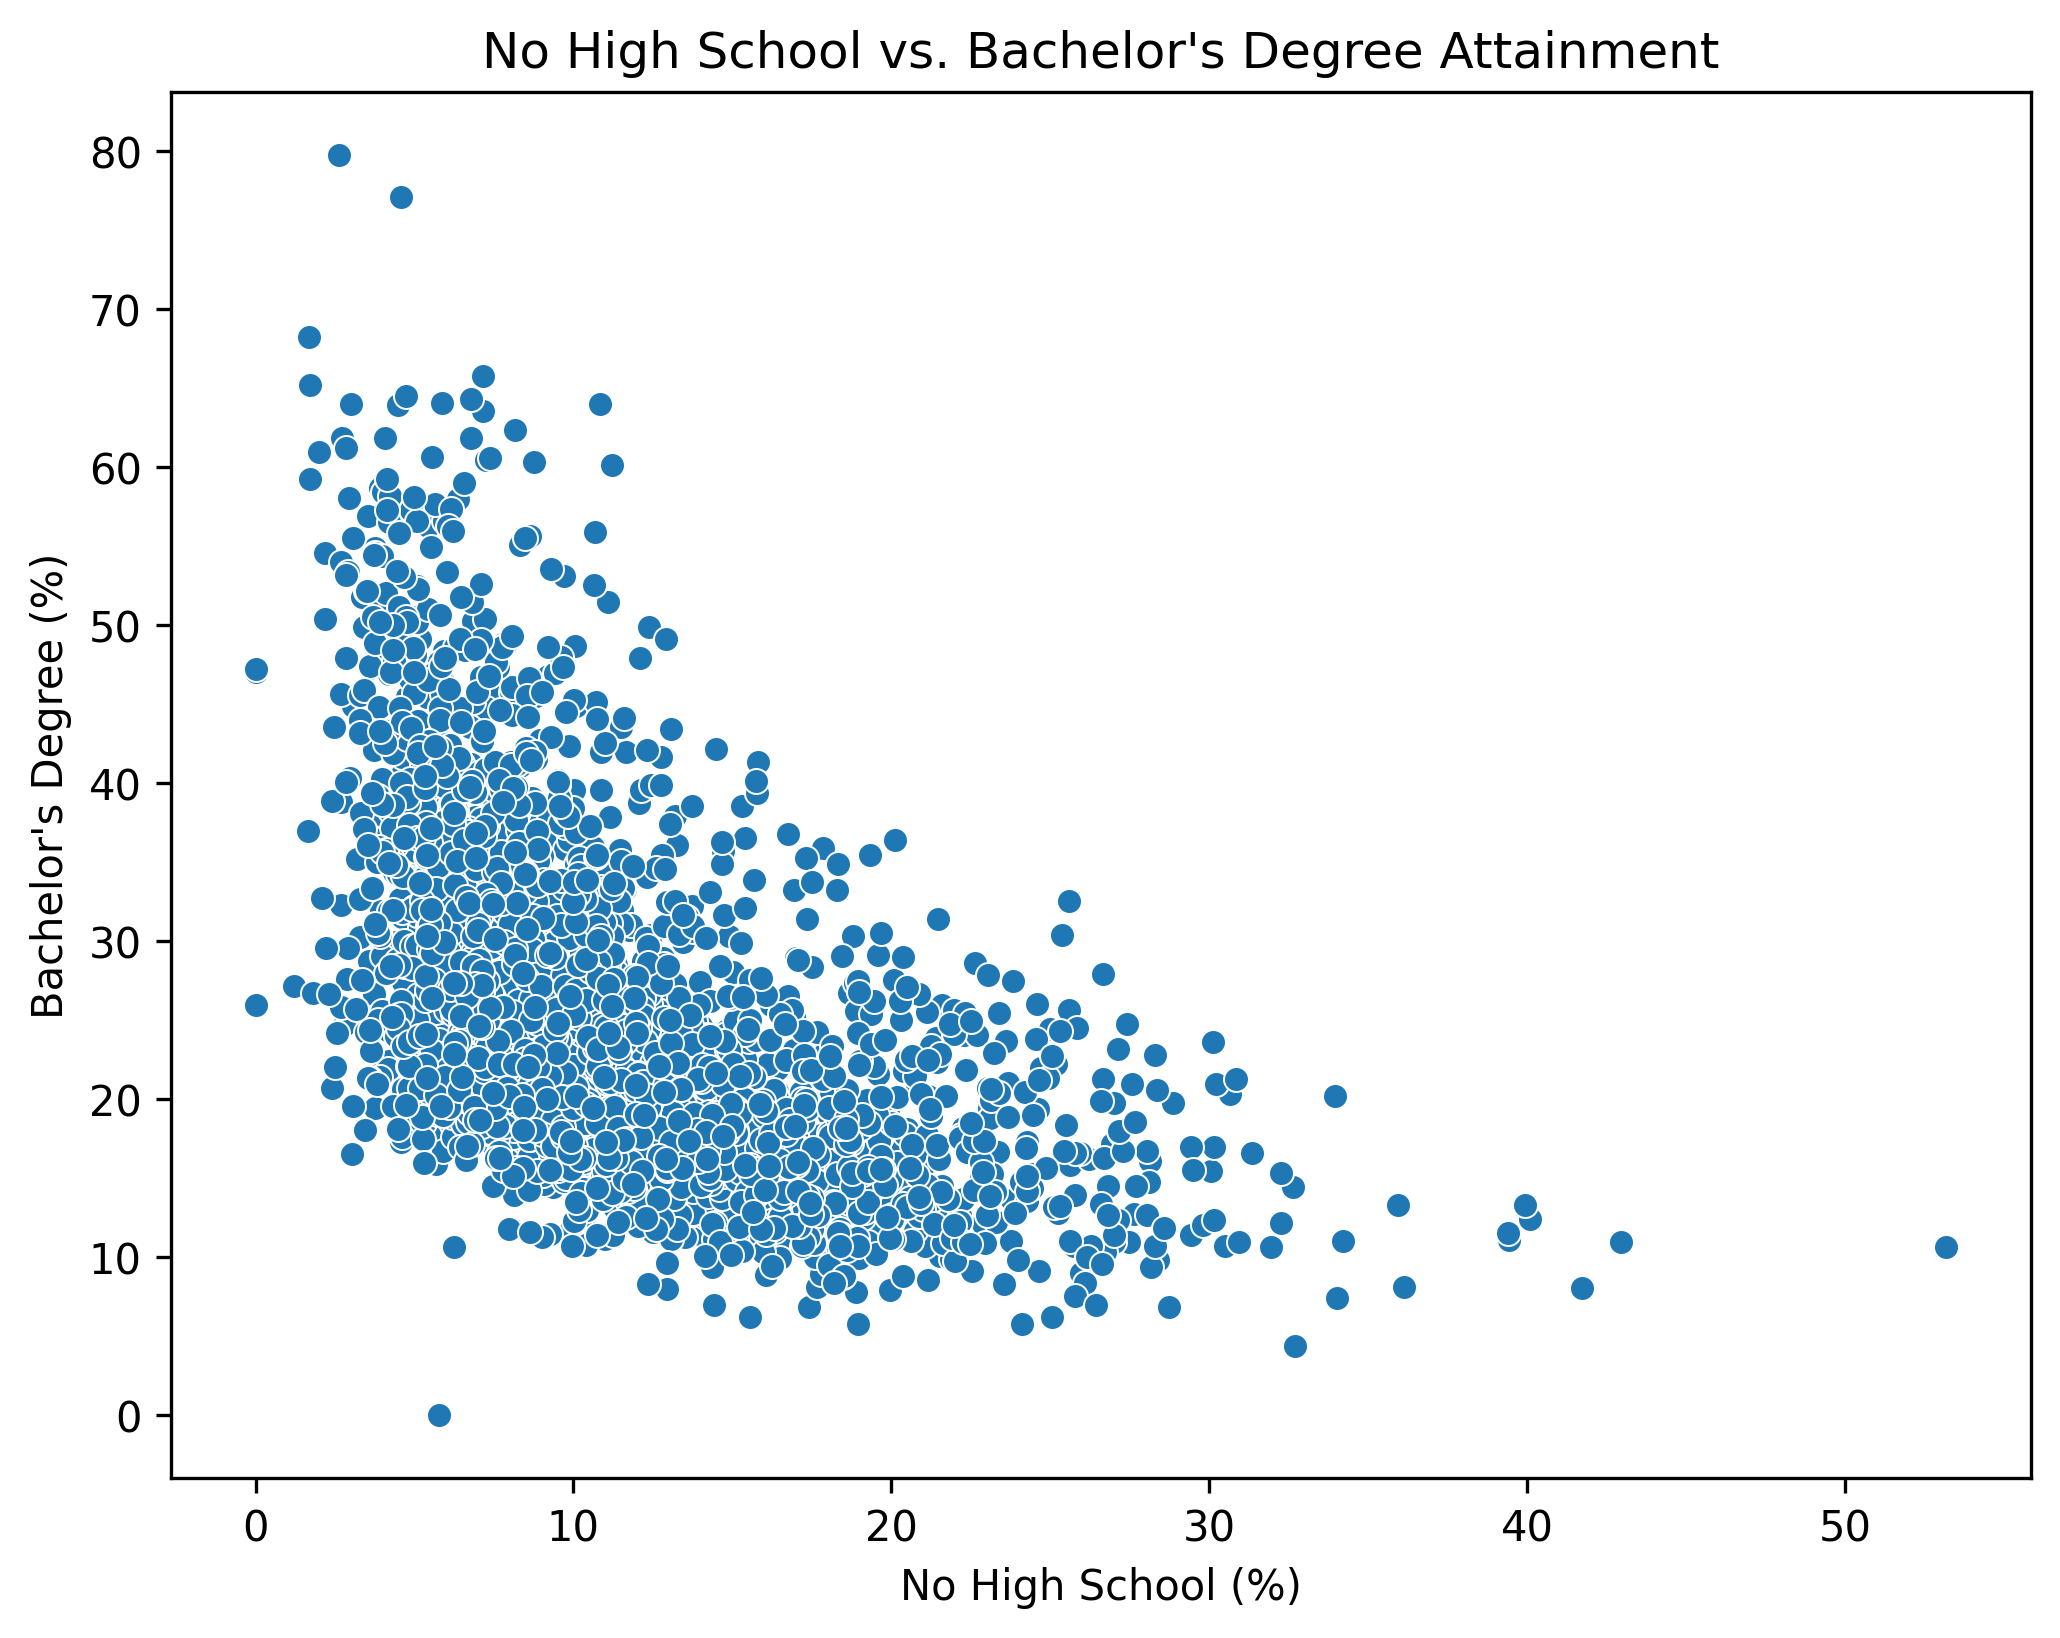

In [142]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ed_filtered["Percent of adults who are not high school graduates, 2019-23"], 
                y=ed_filtered["Percent of adults with a bachelor's degree or higher, 2019-23"])
plt.title("No High School vs. Bachelor's Degree Attainment")
plt.xlabel("No High School (%)")
plt.ylabel("Bachelor's Degree (%)")
plt.show()


C:\Users\jenny\AppData\Local\Temp\ipykernel_15008\12660066.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10["Area name"], x=top_10["Percent of adults with a bachelor's degree or higher, 2019-23"], ax=axes[0], palette="Blues_r")
C:\Users\jenny\AppData\Local\Temp\ipykernel_15008\12660066.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bottom_10["Area name"], x=bottom_10["Percent of adults with a bachelor's degree or higher, 2019-23"], ax=axes[1], palette="Reds_r")


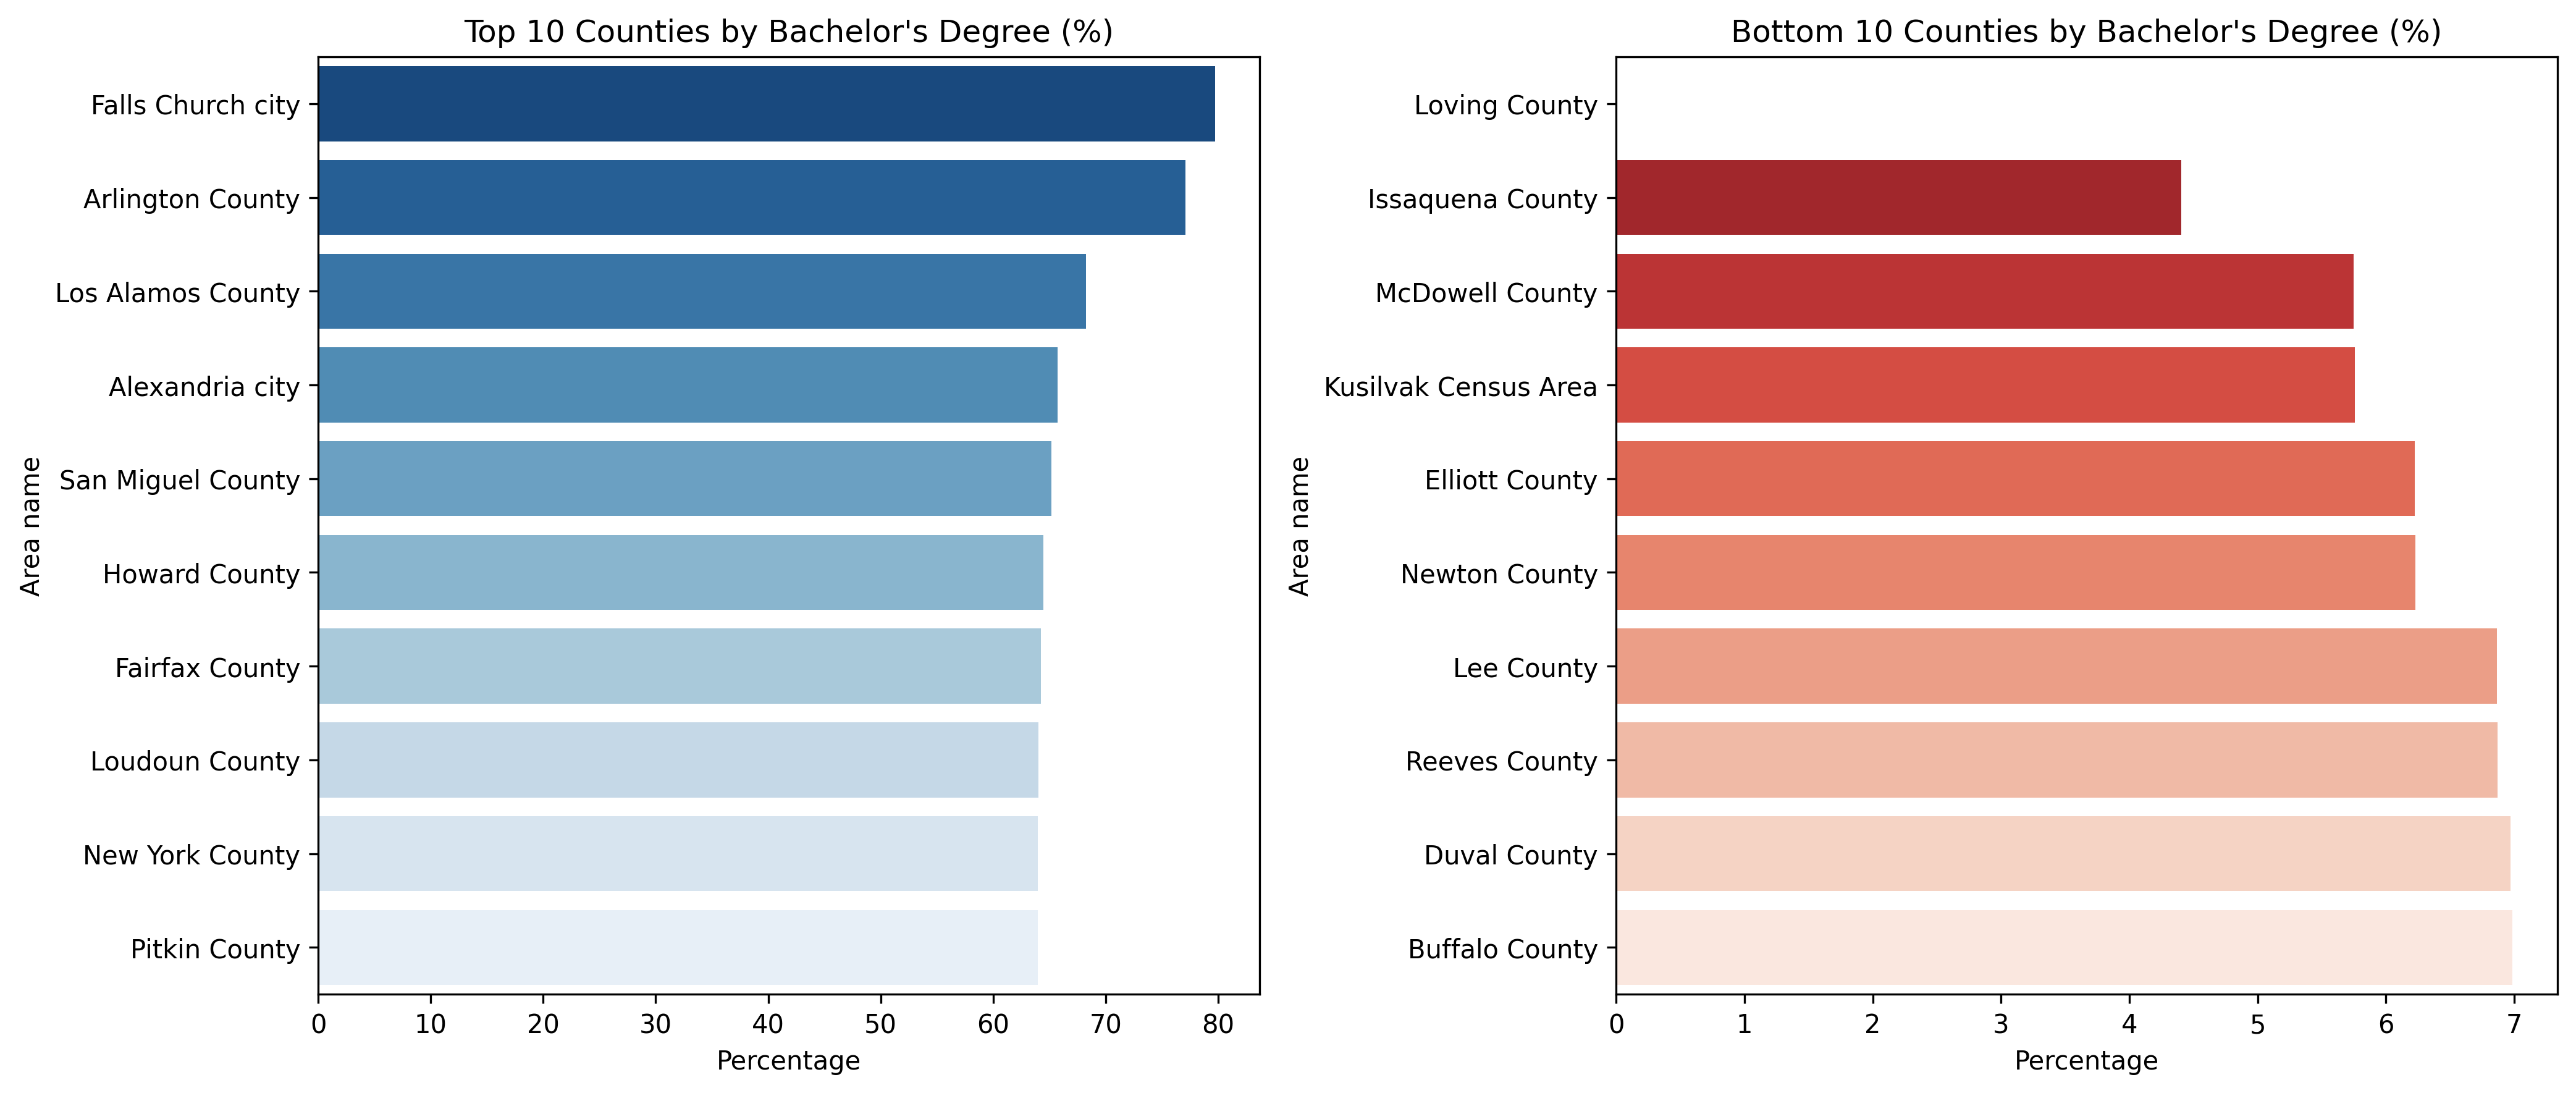

In [143]:
top_10 = ed_filtered.nlargest(10, "Percent of adults with a bachelor's degree or higher, 2019-23")
bottom_10 = ed_filtered.nsmallest(10, "Percent of adults with a bachelor's degree or higher, 2019-23")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 10
sns.barplot(y=top_10["Area name"], x=top_10["Percent of adults with a bachelor's degree or higher, 2019-23"], ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Counties by Bachelor's Degree (%)")
axes[0].set_xlabel("Percentage")

# Bottom 10
sns.barplot(y=bottom_10["Area name"], x=bottom_10["Percent of adults with a bachelor's degree or higher, 2019-23"], ax=axes[1], palette="Reds_r")
axes[1].set_title("Bottom 10 Counties by Bachelor's Degree (%)")
axes[1].set_xlabel("Percentage")

plt.tight_layout()
plt.show()


In [145]:
pop_filtered.columns

Index(['FIPStxt', 'State', 'Area_Name', 'Economic_typology_2015',
       'Rural_Urban_Continuum_Code_2023', 'Urban_Influence_2013',
       'CENSUS_2020_POP', 'ESTIMATES_BASE_2020', 'POP_ESTIMATE_2021',
       'N_POP_CHG_2021', 'BIRTHS_2021', 'DEATHS_2021', 'NATURAL_CHG_2021',
       'INTERNATIONAL_MIG_2021', 'DOMESTIC_MIG_2021', 'NET_MIG_2021',
       'R_BIRTH_2021', 'R_DEATH_2021', 'R_NATURAL_CHG_2021',
       'R_INTERNATIONAL_MIG_2021', 'R_DOMESTIC_MIG_2021', 'R_NET_MIG_2021'],
      dtype='object')

In [146]:
pop_filtered.head()

FIPStxt State       Area_Name  Economic_typology_2015  \
0   00000    US   United States                     NaN   
1   01000    AL         Alabama                     NaN   
2   01001    AL  Autauga County                     0.0   
3   01003    AL  Baldwin County                     5.0   
4   01005    AL  Barbour County                     3.0   

   Rural_Urban_Continuum_Code_2023  Urban_Influence_2013  CENSUS_2020_POP  \
0                              NaN                   NaN      331449281.0   
1                              NaN                   NaN        5024279.0   
2                              2.0                   2.0          58805.0   
3                              3.0                   2.0         231767.0   
4                              6.0                   6.0          25223.0   

   ESTIMATES_BASE_2020  POP_ESTIMATE_2021  N_POP_CHG_2021  ...  \
0          331464948.0        332048977.0        522044.0  ...   
1            5024294.0          5050380.0         18516.0  ...   
2              58809.0            59203.0           288.0  ...   
3             231768.0           239439.0          6212.0  ...   
4              25229.0            24533.0          -436.0  ...   

   NATURAL_CHG_2021  INTERNATIONAL_MIG_2021  DOMESTIC_MIG_2021  NET_MIG_2021  \
0          146036.0                376008.0                0.0      376008.0   
1          -11951.0                  1806.0            27715.0       29521.0   
2             -10.0                    15.0              242.0         257.0   
3            -611.0                   105.0             6972.0        7077.0   
4            -120.0                     0.0             -313.0        -313.0   

   R_BIRTH_2021  R_DEATH_2021  R_NATURAL_CHG_2021  R_INTERNATIONAL_MIG_2021  \
0          10.8          10.4                 0.4                       1.1   
1          11.3          13.7                -2.4                       0.4   
2          11.6          11.8                -0.2                       0.3   
3           9.9          12.5                -2.6                       0.4   
4          10.9          15.8                -4.8                       0.0   

   R_DOMESTIC_MIG_2021  R_NET_MIG_2021  
0                  0.0             1.1  
1                  5.5             5.9  
2                  4.1             4.4  
3                 29.5            29.9  
4                -12.6           -12.6  

[5 rows x 22 columns]

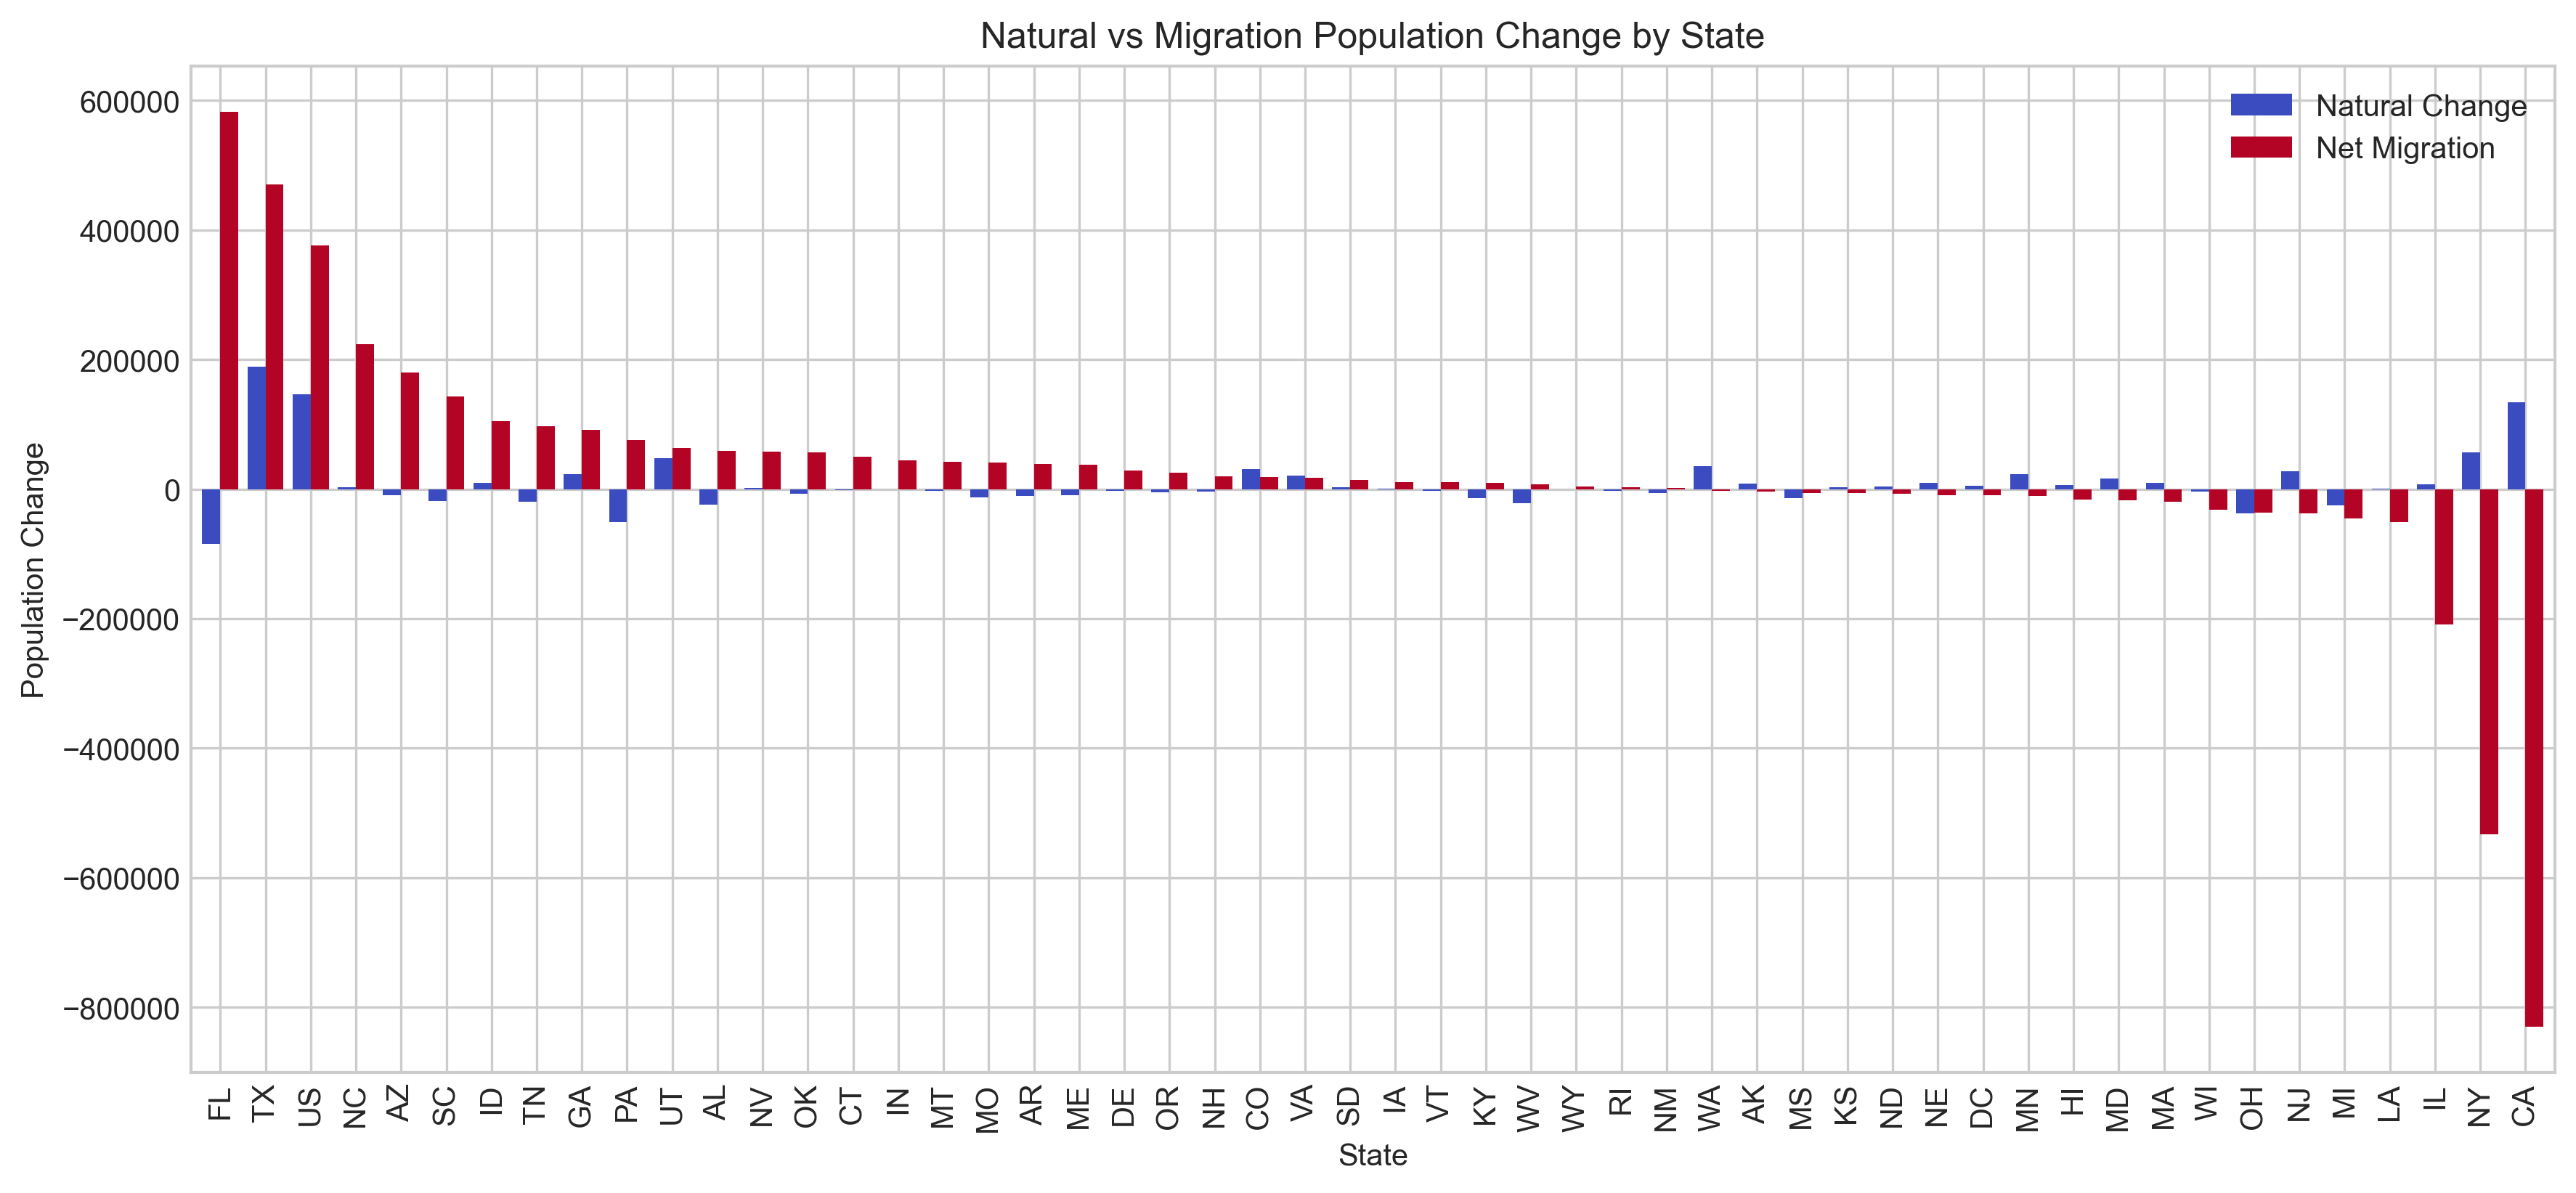

In [164]:
state_pop = pop_filtered.groupby("State")[["NATURAL_CHG_2021", "NET_MIG_2021"]].sum().sort_values("NET_MIG_2021", ascending=False)

state_pop.plot(kind="bar", figsize=(14, 6), colormap="coolwarm", width=0.8)
plt.title("Natural vs Migration Population Change by State")
plt.ylabel("Population Change")
plt.xlabel("State")
plt.legend(["Natural Change", "Net Migration"])
plt.show()
